Posibles preguntas a resolver:
- De los paises que no están en KIOTO, cuales lo hacen peor y mejor
- Lo mismo para los que si están en KIOTO.

#Cuotas de Emisiones GEI

##1. Importar el drive y las librerias y descargar el csv

###1.1. Importar drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


###1.2. Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import math
plt.style.use("ggplot")
from sklearn import model_selection 
from sklearn import metrics

# time calculation to track some processes
import time

# python core library for machine learning and data science
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans


### 1.3. Descargar csv

In [ ]:
df_emis_sec = pd.read_csv("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/Environment_Emissions_by_Sector_E_All_Data_(Normalized).zip (Unzipped Files)/Environment_Emissions_by_Sector_E_All_Data_(Normalized).csv", sep=",", index_col=0, encoding='latin-1')
df_alim = pd.read_csv("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/FoodBalanceSheets_E_All_Data_(Normalized)/FoodBalanceSheets_E_All_Data_(Normalized).csv", sep=",", index_col=0, encoding='latin-1')
df_emis_tot = pd.read_csv("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/Emissions_Totals_E_All_Data_(Normalized)/Emissions_Totals_E_All_Data_(Normalized).csv", sep=",", encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Descargamos el csv con info de agrupaciones de países.

df_agrup_pais = pd.read_csv("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/Agrupaciones Paises.csv")
df_agrup_pais

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,233,Burkina Faso,854.0,BF,BFA
...,...,...,...,...,...,...,...
1964,5000,World,246,Yemen Ar Rp,886.0,NaN,NaN
1965,5000,World,247,Yemen Dem,720.0,NaN,NaN
1966,5000,World,248,Yugoslav SFR,890.0,NaN,NaN
1967,5000,World,251,Zambia,894.0,ZM,ZMB


In [ ]:
df_agrup_pais["Country Group"].unique()

array(['Africa', 'Americas', 'Annex I countries', 'Antarctic Region',
       'Asia', 'Australia and New Zealand', 'Caribbean',
       'Caucasus and Central Asia', 'Central America', 'Central Asia',
       'Central Asia and Southern Asia', 'East Asia (excluding China)',
       'Eastern Africa', 'Eastern Asia',
       'Eastern Asia (excluding Japan and China)',
       'Eastern Asia (excluding Japan)',
       'Eastern Asia and South-eastern Asia', 'Eastern Europe', 'Europe',
       'European Union (27)', 'European Union (28)',
       'High-income economies', 'Land Locked Developing Countries',
       'Latin America and the Caribbean', 'Least Developed Countries',
       'Low income economies', 'Low Income Food Deficit Countries',
       'Lower-middle-income economies', 'Melanesia', 'Micronesia',
       'Middle Africa', 'Net Food Importing Developing Countries',
       'Non-Annex I countries', 'North Africa (excluding Sudan)',
       'Northern Africa', 'Northern America',
       'Northern 

In [ ]:
df_agrup_pais[df_agrup_pais["Country Group"]=="Annex I countries"].Country.unique()

array(['American Samoa', 'Anguilla', 'Aruba', 'Australia', 'Austria',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Bermuda',
       'British Virgin Islands', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Channel Islands', 'Croatia', 'Cyprus', 'Czechia',
       'Czechoslovakia', 'Denmark', 'Estonia',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Finland',
       'France', 'French Guyana', 'French Polynesia', 'Germany',
       'Gibraltar', 'Greece', 'Greenland', 'Guadeloupe', 'Guam',
       'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Japan',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
       'Martinique', 'Mayotte', 'Monaco', 'Montserrat', 'Netherlands',
       'Netherlands Antilles (former)', 'New Caledonia', 'New Zealand',
       'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Pitcairn',
       'Poland', 'Portugal', 'Puerto Rico', 'R?union', 'Romania',
       'Russian Federation',
       'Saint Helena, Ascension and Tr

In [ ]:
df_agrup_pais_transp = df_agrup_pais.pivot_table(index="Country",columns="Country Group",values="Country Code",aggfunc="count").fillna(0)

In [ ]:
# Comprobamos si lo ha hecho bien.

df_agrup_pais_transp["Annex I countries"].sum()

78.0

In [ ]:
# Descargamos el dataset que hemos creado a partir de la Trade Matrix, con la información de importación y expotación de cada país a cada continente.
df_Imp_Exp_Cont = pd.read_pickle("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/df_Import_Export_Continentes.pkl")

df_Imp_Exp_Cont

Grupo de países,Reporter Country Code,Reporter Countries,Year Code,Américas,Asia,Europa,Oceanía,África,Element
0,2,Afghanistan,2009,42795.0,1249016.0,129430.0,151.0,3324.0,Import Quantity
1,2,Afghanistan,2010,89333.0,1117140.0,29063.0,757.0,13314.0,Import Quantity
2,2,Afghanistan,2011,63995.0,1150962.0,14128.0,816.0,31800.0,Import Quantity
3,2,Afghanistan,2014,65068.0,3345901.0,49020.0,176.0,76.0,Import Quantity
4,2,Afghanistan,2015,66864.0,4935864.0,51525.0,222.0,59.0,Import Quantity
...,...,...,...,...,...,...,...,...,...
24,181,Zimbabwe,2016,2.0,57.0,1025.0,1.0,417711.0,Export Quantity
25,181,Zimbabwe,2017,3.0,511.0,1000.0,1.0,373519.0,Export Quantity
26,181,Zimbabwe,2018,62.0,5335.0,2468.0,17.0,447414.0,Export Quantity
27,181,Zimbabwe,2019,110.0,427.0,375.0,2.0,509272.0,Export Quantity


## Tabla de Información Macroeconomica

In [ ]:
df_macro = pd.read_csv("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/Macro-Statistics_Key_Indicators_E_All_Data_(Normalized)/Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv", sep=",", encoding='latin-1')
df_macro

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1970,1970,millions,77.911878,X,NaN
1,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1971,1971,millions,81.574837,X,NaN
2,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1972,1972,millions,74.152916,X,NaN
3,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1973,1973,millions,76.619555,X,NaN
4,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1974,1974,millions,92.774575,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
660656,5817,Net Food Importing Developing Countries,22073,Gross Output (Agriculture),6129,Annual growth US$,2015,2015,%,5.113972,Fc,NaN
660657,5817,Net Food Importing Developing Countries,22073,Gross Output (Agriculture),6129,Annual growth US$,2016,2016,%,0.938010,Fc,NaN
660658,5817,Net Food Importing Developing Countries,22073,Gross Output (Agriculture),6129,Annual growth US$,2017,2017,%,7.441454,Fc,NaN
660659,5817,Net Food Importing Developing Countries,22073,Gross Output (Agriculture),6129,Annual growth US$,2018,2018,%,-4.559164,Fc,NaN


In [ ]:
df_PIB = df_macro[df_macro["Item Code"] == 22008]
df_PIB

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1970,1970,millions,77.911878,X,NaN
1,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1971,1971,millions,81.574837,X,NaN
2,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1972,1972,millions,74.152916,X,NaN
3,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1973,1973,millions,76.619555,X,NaN
4,2,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,1974,1974,millions,92.774575,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
658721,5817,Net Food Importing Developing Countries,22008,Gross Domestic Product,61820,"Annual growth US$ per capita, 2015 prices",2015,2015,%,0.502341,Fc,NaN
658722,5817,Net Food Importing Developing Countries,22008,Gross Domestic Product,61820,"Annual growth US$ per capita, 2015 prices",2016,2016,%,-0.860343,Fc,NaN
658723,5817,Net Food Importing Developing Countries,22008,Gross Domestic Product,61820,"Annual growth US$ per capita, 2015 prices",2017,2017,%,0.117292,Fc,NaN
658724,5817,Net Food Importing Developing Countries,22008,Gross Domestic Product,61820,"Annual growth US$ per capita, 2015 prices",2018,2018,%,0.578572,Fc,NaN


In [ ]:
df_PIB.Element.unique()

array(['Value Local Currency', 'Value US$', 'Value US$ per capita',
       'Value Local Currency, 2015 prices',
       'Value US$ per capita, 2015 prices', 'Value US$, 2015 prices',
       'Annual growth Local Currency',
       'Annual growth Local Currency, 2015 prices', 'Annual growth US$',
       'Annual growth US$ per capita', 'Annual growth US$, 2015 prices',
       'Annual growth US$ per capita, 2015 prices'], dtype=object)

## Tabla de Población

In [ ]:
df_pop = pd.read_csv("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/Population_E_All_Data_(Normalized).zip (Unzipped Files)/Population_E_All_Data_(Normalized).csv", sep=",", encoding='latin-1')

###1.4. Visualización del DataFrame

In [ ]:
df_pop.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1950,1950,1000 persons,7752.118,X,NaN
1,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1951,1951,1000 persons,7840.156,X,NaN
2,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1952,1952,1000 persons,7935.997,X,NaN
3,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1953,1953,1000 persons,8039.694,X,NaN
4,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1954,1954,1000 persons,8151.317,X,NaN


In [ ]:
df_pop.Item.unique()

array(['Population - Est. & Proj.'], dtype=object)

In [ ]:
df_pop.Element.unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

## Tabla de Alimentos

In [ ]:
df_alim.columns

Index(['Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')

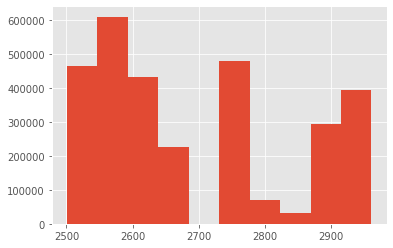

In [ ]:
df_alim["Item Code"].hist()

In [ ]:
# Miramos qué agrupaciones de alimentos tenemos

df_alim[df_alim["Item Code"]>2700]["Item"].unique()

array(['Grand Total', 'Vegetal Products', 'Animal Products',
       'Cereals - Excluding Beer', 'Rice and products', 'Starchy Roots',
       'Sugar Crops', 'Sugar & Sweeteners', 'Honey', 'Pulses', 'Treenuts',
       'Oilcrops', 'Vegetable Oils', 'Vegetables',
       'Fruits - Excluding Wine', 'Stimulants', 'Spices',
       'Alcoholic Beverages', 'Meat', 'Bovine Meat', 'Mutton & Goat Meat',
       'Pigmeat', 'Poultry Meat', 'Meat, Other', 'Offals',
       'Offals, Edible', 'Animal fats', 'Butter, Ghee', 'Cream',
       'Fats, Animals, Raw', 'Eggs', 'Milk - Excluding Butter',
       'Fish, Seafood', 'Freshwater Fish', 'Miscellaneous',
       'Fish, Body Oil', 'Fish, Liver Oil', 'Demersal Fish',
       'Pelagic Fish', 'Marine Fish, Other', 'Crustaceans', 'Cephalopods',
       'Molluscs, Other', 'Aquatic Products, Other',
       'Aquatic Animals, Others', 'Aquatic Plants',
       'Meat, Aquatic Mammals'], dtype=object)

## Tabla de Emisiones por sector

In [ ]:
df_emis_sec[df_emis_sec.duplicated(keep=False)]

,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Area Code,,,,,,,,,,


## 2. Data Understanding

###2.1. Análisis univariante de datos


2.1.1. Distibución de los valores TARGET

La variable TARGET puede hacer referencia a distintos tipos de información. Por el momento dejamos su análisis para más adelante.

In [ ]:
TARGET = "Value"

2.1.2. Distribución de las variables independientes

###3. Data Preparation

No hay nulos

###4. Visualización cuotas Emisiones GEI

###4.1. Gráfico de barras horizontales   - RICARD

####Cuotas Emisiones GEI por Áreas

In [ ]:
df_emis_sec["Item"].unique()

array(['Farm-gate emissions', 'Land Use change',
       'Pre- and post- production', 'Fertilizers Manufacturing',
       'IPCC Agriculture', 'LULUCF', 'On-farm electricity use',
       'LULUCF - food systems', 'Energy', 'Food Processing',
       'Energy - food systems', 'Food Transport', 'IPPU', 'Food Retail',
       'Food Waste Disposal', 'Waste', 'Waste - food systems',
       'Food Household Consumption', 'Food Packaging',
       'All sectors with LULUCF', 'All sectors without LULUCF', 'Other',
       'Food systems', 'AFOLU', 'Emissions on agricultural land',
       'IPPU - food systems', 'Food Transport - International Bunkers',
       'International bunkers', 'International bunkers - food systems'],
      dtype=object)

In [ ]:
df_emis_sec

,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Area Code,,,,,,,,,,
2,Afghanistan,6996,Farm-gate emissions,726313,Emissions Share (CO2eq) (AR5),1990,1990,%,80.2607,Fc
2,Afghanistan,6996,Farm-gate emissions,726313,Emissions Share (CO2eq) (AR5),1991,1991,%,80.8281,Fc
2,Afghanistan,6996,Farm-gate emissions,726313,Emissions Share (CO2eq) (AR5),1992,1992,%,86.8858,Fc
2,Afghanistan,6996,Farm-gate emissions,726313,Emissions Share (CO2eq) (AR5),1993,1993,%,86.1400,Fc
2,Afghanistan,6996,Farm-gate emissions,726313,Emissions Share (CO2eq) (AR5),1994,1994,%,85.3637,Fc
...,...,...,...,...,...,...,...,...,...,...
5873,OECD,6995,Emissions on agricultural land,7274,Emissions (F-gases),2015,2015,kilotonnes,0.0000,A
5873,OECD,6995,Emissions on agricultural land,7274,Emissions (F-gases),2016,2016,kilotonnes,0.0000,A
5873,OECD,6995,Emissions on agricultural land,7274,Emissions (F-gases),2017,2017,kilotonnes,0.0000,A


In [ ]:
df_ultimo_año = df_emis_sec[df_emis_sec["Year"]==max(df_emis_sec["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año.head()

,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,Afghanistan,6996,Farm-gate emissions,726313,Emissions Share (CO2eq) (AR5),2019,2019,%,49.7945,Fc
1,Afghanistan,6996,Farm-gate emissions,7264,Emissions Share (CO2),2019,2019,%,1.1861,Fc
2,Afghanistan,6996,Farm-gate emissions,7265,Emissions Share (CH4),2019,2019,%,65.6026,Fc
3,Afghanistan,6996,Farm-gate emissions,7266,Emissions Share (N2O),2019,2019,%,90.3443,Fc
4,Afghanistan,6996,Farm-gate emissions,723113,Emissions (CO2eq) (AR5),2019,2019,kilotonnes,16471.2413,Fc


In [ ]:
df_ultimo_año = df_ultimo_año[ (df_ultimo_año["Element"]=="Emissions (CO2eq) (AR5)") &  (df_ultimo_año["Item"]=='All sectors with LULUCF')]
df_ultimo_año_area = df_ultimo_año.groupby("Area")[[TARGET]].sum().reset_index()
df_ultimo_año_area

,Area,Value
0,Afghanistan,3.307847e+04
1,Africa,4.777883e+06
2,Albania,9.346266e+03
3,Algeria,2.815507e+05
4,American Samoa,-4.114590e+01
...,...,...
260,Western Sahara,-1.043568e+02
261,World,5.399973e+07
262,Yemen,3.657652e+04
263,Zambia,9.439525e+04


In [ ]:
tabla_orden = df_ultimo_año_area.sort_values(TARGET,ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Area,Value
0,European Union (27),3.644844e+06
1,India,3.848732e+06
2,European Union (28),4.094367e+06
3,South-eastern Asia,4.108186e+06
4,Africa,4.777883e+06
5,Net Food Importing Developing Countries,5.270700e+06
6,Southern Asia,5.809754e+06
7,United States of America,6.229081e+06
8,Europe,6.756433e+06
9,Northern America,7.076020e+06


In [ ]:
fig = px.bar(tabla_orden, x=TARGET, y="Area", title="Cuotas Emisiones GEI por Área", text=TARGET, orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area[TARGET])+100000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")


Terminología:

Países No Anexo 1: Paises que no forman parte de l protocolo de Kyoto

Paises Anexo 1: 35 países desarrollados (industrializados) que acordaron limitar sus emisiones de gases que incrementan el efecto invernadero (GEI/GHGs.Protocolo de Kyoto

OECD: organismo de cooperación internacional compuesto por 38 estados, cuyo objetivo es coordinar sus políticas económicas y sociales

Países con bajos ingresos y deficit alimentario: Benin, Burkina Faso, Burundi, Camerún, Chad, Comoras, Congo, Côte d'Ivoire1, Eritrea, Etiopía, Gambia, Ghana1,Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Madagascar, Malawi, Malí,Mauritania, Mozambique, Níger, República Centroafricana, República Democrática del Congo, República Unida de Tanzanía, Rwanda, Santo Tomé y Príncipe, Senegal,Sierra Leona, Somalia, Sudán, Sudán del Sur, Togo, Uganda, Zimbabwe, Haití, Nicaragua, Afganistán, Bangladesh, Kirguistán, Nepal, República Popular, Democrática de Corea, República Árabe Siria, Tayikistán, Uzbekistán y Yemen

Conclusiones: 

1. Los países que no forman parte del tratado de Kyoto emiten mas Gases GEI que los que si forman parte.
2. Los continentes que emiten más gases GEI son Asia, America y Europa
3. Los países que emiten más gases GEI son China, EEUU y Unión Europea




####Cuotas de emisiones GEI por Sector

In [ ]:
df_ultimo_año = df_emis_sec[df_emis_sec["Year"]==max(df_emis_sec["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año_producto = df_ultimo_año.groupby("Item")[[TARGET]].sum().reset_index()
df_ultimo_año_producto

,Item,Value
0,AFOLU,5.929608e+07
1,All sectors with LULUCF,5.511669e+08
2,All sectors without LULUCF,5.304495e+08
3,Emissions on agricultural land,9.556327e+07
4,Energy,4.250511e+08
5,Energy - food systems,5.335777e+07
6,Farm-gate emissions,5.333568e+07
7,Fertilizers Manufacturing,4.513034e+06
8,Food Household Consumption,1.524405e+07
9,Food Packaging,3.580216e+06


In [ ]:
tabla_orden = df_ultimo_año_producto.sort_values(TARGET,ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Item,Value
0,Food Transport,6.406230e+06
1,Food Waste Disposal,8.196959e+06
2,Waste - food systems,8.196959e+06
3,Food Retail,8.386281e+06
4,Food Household Consumption,1.524405e+07
5,Waste,1.526221e+07
6,LULUCF,2.071731e+07
7,IPCC Agriculture,3.857877e+07
8,Land Use change,4.222759e+07
9,IPPU,4.738155e+07


In [ ]:
fig = px.bar(tabla_orden, x=TARGET, y="Item", title="Cuotas Emisiones GEI por Producto", text=TARGET, orientation="h", width=1000, height=700, range_x =[0, max(df_ultimo_año_producto[TARGET])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Acronimos:

LULUCF: Land Use, Land-Use Change and Forestry (Uso de la Tierra, Cambio de Uso de la Tierra y Silvicultura)

AFOLU: Agriculture, Forestry and Other Land Uses (Agricultura, Silvicultura y Otros Usos de la Tierra)

Conclusiones:

1. Las emisiones totales que incluyen el uso de la tierra, cambio de uso y silvicultura son mayores les que las que no las incluyen
2. La mayor parte de las emisiones GEI provienen de la energía, los sistemas alimentarios y las emisiones en tierras agrícolas 

####Cuotas de Emisiones GEI por Elemento

In [ ]:
df_ultimo_año = df_emis_sec[df_emis_sec["Year"]==max(df_emis_sec["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año_elemento = df_ultimo_año.groupby("Element")[[TARGET]].sum().reset_index()
df_ultimo_año_elemento

,Element,Value
0,Emissions (CH4),1.150947e+07
1,Emissions (CO2),8.900890e+08
2,Emissions (CO2eq) (AR5),1.366081e+09
3,Emissions (F-gases),8.072512e+03
4,Emissions (N2O),4.218482e+05
5,Emissions Share (CH4),1.301334e+05
6,Emissions Share (CO2),1.098135e+05
7,Emissions Share (CO2eq) (AR5),1.185640e+05
8,Emissions Share (F-gases),6.979445e+04
9,Emissions Share (N2O),1.435626e+05


In [ ]:
tabla_orden = df_ultimo_año_elemento.sort_values(TARGET,ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Element,Value
0,Emissions (F-gases),8.072512e+03
1,Emissions Share (F-gases),6.979445e+04
2,Emissions Share (CO2),1.098135e+05
3,Emissions Share (CO2eq) (AR5),1.185640e+05
4,Emissions Share (CH4),1.301334e+05
5,Emissions Share (N2O),1.435626e+05
6,Emissions (N2O),4.218482e+05
7,Emissions (CH4),1.150947e+07
8,Emissions (CO2),8.900890e+08
9,Emissions (CO2eq) (AR5),1.366081e+09


In [ ]:
fig = px.bar(tabla_orden, x=TARGET, y="Element", title="Cuotas Emisiones GEI por Elemento", text=TARGET, orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area[TARGET])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Terminología:

CO2eq: El dióxido de carbono equivalente es una medida universal utilizada para indicar en términos de CO2, el equivalente de cada uno de los gases de efecto invernadero con respecto a su potencial de calentamiento global

Co2: está ligado fundamentalmente a la quema de los combustibles fósiles (el carbón, el petróleo y el gas)

CH4: se produce de forma natural por la descomposición de la materia orgánica. Los humedales, el ganado (fermentación entérica) y la energía son las principales fuentes que emiten metano a la atmósfera

Conclusiones:

1. La emisiones totales de CO2eq a la atmosfera son de 1.366.080.648 mil toneladas
2. Los elementos GEI más abundantes son el CO2 y en menor proporción CH4

###4.2. Gráfico evolutivo lineal

####Evolutivo Cuotas Emisiones GEI por Area

In [ ]:
evolutivo_lineas_Area = df_emis_sec.groupby(["Area","Year"])[TARGET].sum().reset_index().sort_values(TARGET,ascending=False)

evolutivo_lineas_Area 

,Area,Year,Value
7815,World,2019,3.809741e+08
7814,World,2018,3.766757e+08
7813,World,2017,3.691497e+08
7811,World,2015,3.666066e+08
7810,World,2014,3.654270e+08
...,...,...,...
5894,Romania,2011,-8.926611e+05
5895,Romania,2012,-9.157295e+05
5896,Romania,2013,-9.577192e+05
5897,Romania,2014,-9.592754e+05


In [ ]:

px.line(evolutivo_lineas_Area,x="Year",y=TARGET,color="Area",title="Evolutivo Cuotas Emisiones GEI por Área")

In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)
px.line(evolutivo_lineas_Area,x="Year",y=TARGET,color="Area",title="Evolutivo Cuotas Emisiones GEI por Área")

Conclusiones:

1. A partir del 2003, la evolución de emisiones GEI, crecen más en los países que no forman parte del tratado de Kyoto y Asia que en el resto de áreas. Este periodo coincide con la entrada en vigor de dicho tratado (2005)
2. La crisis Subprime no supuso un cambio importante en las emisiones.

In [ ]:
# Segun el gráfico anterior hay una correlación total entre las emisiones del mundo y Asia.
# Corroboramos en un gráfico que es China la que ha provocado este incremento en los últimos años.
# Visualizaremos en un gráfico los países que más han emitido en los últimos tiempos, junto con Asia. 

#cond_paises = df[["Area"]].drop_duplicates().reset_index()["Area Code"] < 1000  #loc[0:251]
#Area_codes_paises = df[["Area"]].drop_duplicates().reset_index()[cond_paises]["Area Code"].to_list()

# Buscamos los países que más han emitidos en los últimos años.

#df[(df["Area Code"]<1000) & (df["Item Code"]=="6825") & (df["Element Code"] == 723113)]["Area", ""]
df2 = df_emis_sec.reset_index()
df2 = df2[(df2["Area Code"]<1000) & (df2["Item Code"]==6825) & (df2["Element Code"] == 723113)]
ls_paises_mas_cont = df2.groupby("Area")[["Value"]].max().reset_index().sort_values("Value", ascending=False)["Area"].head(10).to_list()
ls_paises_mas_cont

df2_short = df2[df2["Area"].isin(ls_paises_mas_cont)][["Area", "Year", "Value"]]
df2_short
#df2 = df.reset_index()
#df2 = df2[df2[("Area Code"]<1000) | (df2['Area'] == "Asia")]
#evolutivo_lineas_Area = df2_short.groupby(["Area","Year"])[TARGET].sum().reset_index().sort_values(TARGET,ascending=False)
px.line(df2_short,x="Year",y=TARGET,color="Area",title="Evolutivo Cuotas Emisiones GEI por Área")

En los últimos 30 años, los paises más contaminantes se han mantenido estable y con una ligera tendencia a la baja, con la excepción de China, que és el que más contamina y el que más ha crecido.... probablemente relacionado con la población y exportaciones? O más con el PIB?

#Maismo gráfico que antes pero añadiendo el total mundial

In [ ]:
# Buscamos los países que más han emitidos en los últimos años.

#df[(df["Area Code"]<1000) & (df["Item Code"]=="6825") & (df["Element Code"] == 723113)]["Area", ""]
df2 = df_emis_sec.reset_index()
df2 = df2[((df2["Area Code"]<1000)|(df2["Area Code"]==5000) )& (df2["Item Code"]==6825) & (df2["Element Code"] == 723113)]
ls_paises_mas_cont = df2.groupby("Area")[["Value"]].max().reset_index().sort_values("Value", ascending=False)["Area"].head(10).to_list()
ls_paises_mas_cont

df2_short = df2[df2["Area"].isin(ls_paises_mas_cont)][["Area", "Year", "Value"]]
df2_short
#df2 = df.reset_index()
#df2 = df2[df2[("Area Code"]<1000) | (df2['Area'] == "Asia")]
#evolutivo_lineas_Area = df2_short.groupby(["Area","Year"])[TARGET].sum().reset_index().sort_values(TARGET,ascending=False)
px.line(df2_short,x="Year",y=TARGET,color="Area",title="Evolutivo Cuotas Emisiones GEI por Área")

La mitad del augmento es de China. Se tendría que ver el resto como se comportan pero parece que la suma de muchos países, entre ellos India.
Los más ricos y contaminantes se mantienen estables.

Preguntas que nos podemos hacer:
- el crecimiento de China es debido al crecimiento de sus exportaciones, es decir, que en realidad los paises ricos estan contaminando más, indirectamente?
- I el resto de paises, es también debido a sus exportaciones que no bajan más? De las exportaciones a China, quizás? Sabemos que CHina es uno de los más importadores.

####Evolutivo Cuotas Emisiones GEI por Producto

In [ ]:
evolutivo_lineas_Producto = df_emis_sec.groupby(["Item","Year"])["Value"].sum().reset_index().sort_values("Value",ascending=False)

evolutivo_lineas_Producto 

,Item,Year,Value
59,All sectors with LULUCF,2019,5.511669e+08
58,All sectors with LULUCF,2018,5.473425e+08
57,All sectors with LULUCF,2017,5.365010e+08
89,All sectors without LULUCF,2019,5.304495e+08
56,All sectors with LULUCF,2016,5.295816e+08
...,...,...,...
390,Food Transport - International Bunkers,1990,5.624660e+04
600,International bunkers - food systems,1990,5.624660e+04
542,IPPU - food systems,1992,3.752685e+04
541,IPPU - food systems,1991,1.042320e+04


In [ ]:
# No terminaba de salir bien, pero con un Sort_values ha quedado arreglado
evolutivo_lineas_Producto.sort_values("Year", inplace=True)
px.line(evolutivo_lineas_Producto,x="Year",y="Value",color="Item",title="Evolutivo Cuotas Emisiones GEI por Producto")

Conclusiones:

1. A partir del 2002, la evolución de emisiones GEI procedentes de la energía crecen más que en el resto de productos

- Hay algunos que están bastante correlados con el total, como la energía. Es la que más aumenta.

####Evolutivo Cuotas Emisiones GEI por Elemento

In [ ]:
evolutivo_lineas_Elemento = df_emis_sec.groupby(["Element","Year"])["Value"].sum().reset_index().sort_values("Value",ascending=False)

evolutivo_lineas_Elemento

,Element,Year,Value
89,Emissions (CO2eq) (AR5),2019,1.366081e+09
88,Emissions (CO2eq) (AR5),2018,1.352327e+09
87,Emissions (CO2eq) (AR5),2017,1.330534e+09
85,Emissions (CO2eq) (AR5),2015,1.316190e+09
86,Emissions (CO2eq) (AR5),2016,1.314938e+09
...,...,...,...
93,Emissions (F-gases),1993,1.396647e+03
92,Emissions (F-gases),1992,1.281729e+03
91,Emissions (F-gases),1991,1.258933e+03
90,Emissions (F-gases),1990,1.182245e+03


In [ ]:
px.line(evolutivo_lineas_Elemento,x="Year",y="Value",color="Element",title="Evolutivo Cuotas Emisiones GEI por Elemento")

Conclusiones:

A partir del 2003, la evolución de emisiones de CO2 crecen más que en el resto de elementos

# Clustering.

Haremos merge de quantitat exportada i/o població i/o PIB?
Añadimos promedio últimos años?

## Clustering por emisiones por sector

Nos fijamos en el año 2019 por ser el 2020 considerado un outlier debido a la pandemia.  Podríamos hacer un promedio de los últimos 5 años.

In [ ]:
AÑO_CLUSTER = 2019
TARGET_ELEMENT = 'Emissions (CO2eq) (AR5)'



In [ ]:
df_emis_sec.columns

Index(['Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')

In [ ]:
df_emis_sec = df_emis_sec.reset_index()

In [ ]:
# Seleccionamos el año 2019, el Elemento 'Emissions (CO2eq) (AR5)', y sólo los paises, no agrupaciones.

df_2019_CO2eq = df_emis_sec[(df_emis_sec["Year"]== AÑO_CLUSTER) & (df_emis_sec['Element']==TARGET_ELEMENT) & (df_emis_sec["Area Code"]<1000)]

In [ ]:
# Comprobamos que ha cogido bien el Elemento

df_2019_CO2eq.Element.unique()

array(['Emissions (CO2eq) (AR5)'], dtype=object)

In [ ]:
df_2019_CO2eq.Item.unique()

array(['Farm-gate emissions', 'Land Use change',
       'Pre- and post- production', 'Fertilizers Manufacturing',
       'IPCC Agriculture', 'LULUCF', 'On-farm electricity use',
       'LULUCF - food systems', 'Energy', 'Food Processing',
       'Energy - food systems', 'Food Transport', 'IPPU', 'Food Retail',
       'Food Waste Disposal', 'Waste', 'Waste - food systems',
       'Food Household Consumption', 'Food Packaging',
       'All sectors with LULUCF', 'All sectors without LULUCF', 'Other',
       'Food systems', 'AFOLU', 'Emissions on agricultural land',
       'IPPU - food systems'], dtype=object)

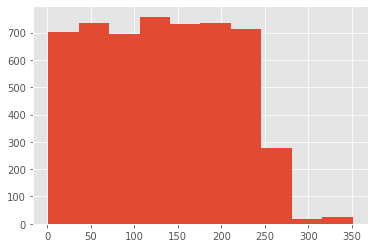

In [ ]:
df_2019_CO2eq["Area Code"].hist()

In [ ]:
df_2019_CO2eq.head()

,index,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
149,149,2,Afghanistan,6996,Farm-gate emissions,723113,Emissions (CO2eq) (AR5),2019,2019,kilotonnes,16471.2413,Fc
419,419,2,Afghanistan,6516,Land Use change,723113,Emissions (CO2eq) (AR5),2019,2019,kilotonnes,0.0000,Fc
689,689,2,Afghanistan,6517,Pre- and post- production,723113,Emissions (CO2eq) (AR5),2019,2019,kilotonnes,4435.8857,A
899,899,2,Afghanistan,6504,Fertilizers Manufacturing,723113,Emissions (CO2eq) (AR5),2019,2019,kilotonnes,23.2331,Fc
1109,1109,2,Afghanistan,1711,IPCC Agriculture,723113,Emissions (CO2eq) (AR5),2019,2019,kilotonnes,16342.7221,A


In [ ]:
# Comprobamos nulos

df_2019_CO2eq.isnull().sum()

index           0
Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

In [ ]:
# Hacemos pivot table para poner los Items como columnas

df_2019_CO2eq_transp = df_2019_CO2eq.pivot_table(index="Area",columns="Item",values="Value",aggfunc="mean")
df_2019_CO2eq_transp.head(1)

Item,AFOLU,All sectors with LULUCF,All sectors without LULUCF,Emissions on agricultural land,Energy,Energy - food systems,Farm-gate emissions,Fertilizers Manufacturing,Food Household Consumption,Food Packaging,...,IPPU,IPPU - food systems,LULUCF,LULUCF - food systems,Land Use change,On-farm electricity use,Other,Pre- and post- production,Waste,Waste - food systems
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16497.3795,33078.4675,32923.8101,16471.2413,10612.83,1061.0057,16471.2413,23.2331,486.414,12.1979,...,308.968,NaN,154.6574,0.0,0.0,43.9521,89.04,4435.8857,5570.25,3503.3924


In [ ]:
# Miramos nulos

df_2019_CO2eq_transp.isnull().sum()

Item
AFOLU                               1
All sectors with LULUCF             1
All sectors without LULUCF          1
Emissions on agricultural land      0
Energy                             28
Energy - food systems               3
Farm-gate emissions                 0
Fertilizers Manufacturing         165
Food Household Consumption          5
Food Packaging                     29
Food Processing                    28
Food Retail                        11
Food Transport                     21
Food Waste Disposal                 4
Food systems                        0
IPCC Agriculture                    1
IPPU                               28
IPPU - food systems               133
LULUCF                              1
LULUCF - food systems               1
Land Use change                     1
On-farm electricity use            10
Other                              32
Pre- and post- production           2
Waste                              27
Waste - food systems                4
dtype: 

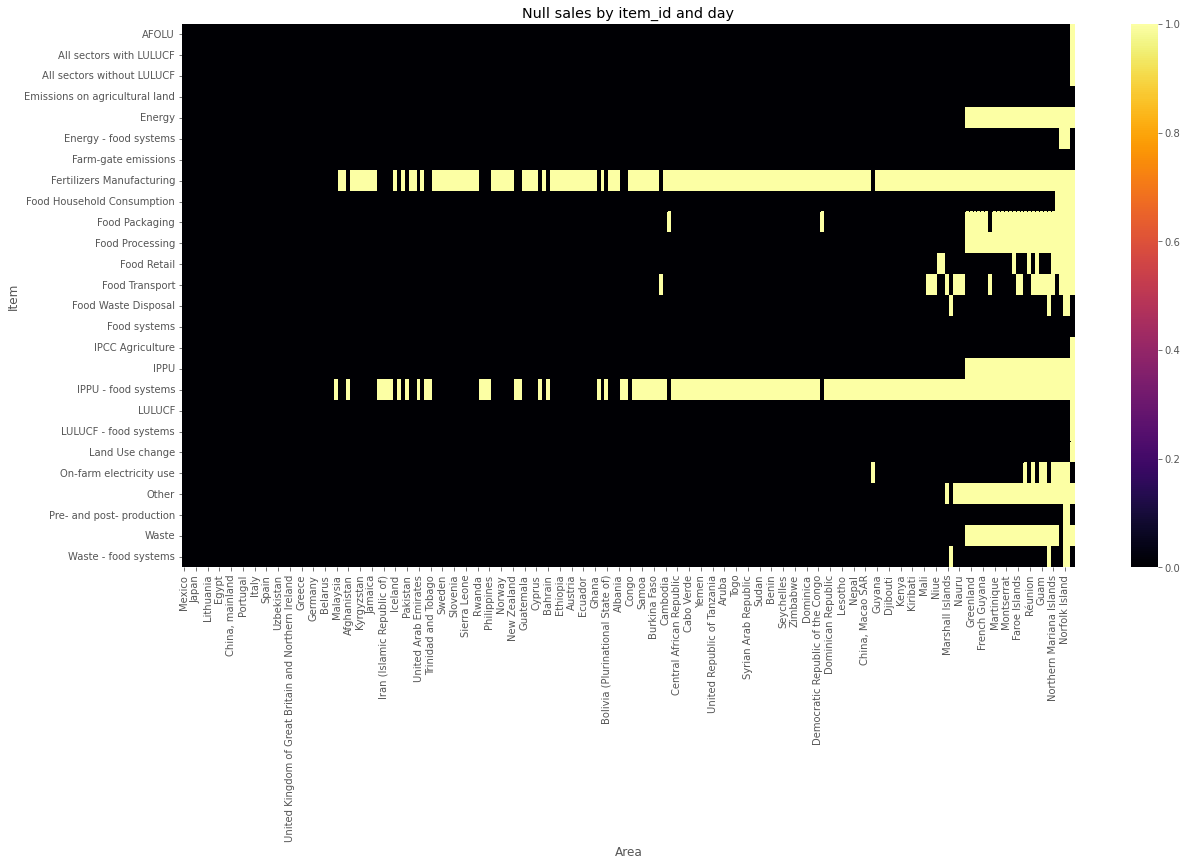

In [ ]:
# Observamos los nulos (Estamos sólo con los datos del último año)

gb_df_ = df_2019_CO2eq_transp.isnull().T
order_of_columns = list(gb_df_.sum().sort_values().index)
gb_df_ = gb_df_[order_of_columns]

plt.figure(figsize = (20, 10))
plot = sns.heatmap(gb_df_, cbar = True, cmap = "inferno")
plot.set_title("Null sales by item_id and day");

In [ ]:
df_2019_CO2eq_transp["IPPU - food systems"].isnull()

Area
Afghanistan                   True
Albania                      False
Algeria                      False
American Samoa                True
Angola                       False
                             ...  
Wallis and Futuna Islands     True
Western Sahara                True
Yemen                         True
Zambia                       False
Zimbabwe                      True
Name: IPPU - food systems, Length: 228, dtype: bool

In [ ]:
# Estos nulos se han creado al generar la pivot_table, que significa que para esos nulos no había ningún registro. Hay algunos Elmentos que deberían de tener información.
# Podríamos llenar los nulos según su parecido con el algortimo KNN, aunque hay algunas variables con tantos nulos que no sé sería la mejor opción.
# En el caso del "IPPU - Food systems" 

df_emis_sec["Value"].isnull().sum()

0

La base de dataos iniciano no tenía nulos

In [ ]:
# cuantas filas tenemos?
df_2019_CO2eq_transp.shape

(228, 26)

Se han creado nulos al hacer la pivot_table. En algunos como "Fertilizers Manufacturing" hay muchos nulos, pero podría ser que no todos los países tengan la capacidad de fabricar fertilizantes. En este caso llenaría con 0's.

In [ ]:
# VAR_TO_DROP = ["Food Transport - International Bunkers","International bunkers","International bunkers - food systems", "IPPU - food systems"]

VAR_TO_DROP = ["IPPU - food systems"]

In [ ]:
df_clust = df_2019_CO2eq_transp.drop(VAR_TO_DROP, axis=1)

In [ ]:
df_clust['Fertilizers Manufacturing'].fillna(0, inplace=True)

In [ ]:
df_clust.isnull().sum()

Item
AFOLU                              1
All sectors with LULUCF            1
All sectors without LULUCF         1
Emissions on agricultural land     0
Energy                            28
Energy - food systems              3
Farm-gate emissions                0
Fertilizers Manufacturing          0
Food Household Consumption         5
Food Packaging                    29
Food Processing                   28
Food Retail                       11
Food Transport                    21
Food Waste Disposal                4
Food systems                       0
IPCC Agriculture                   1
IPPU                              28
LULUCF                             1
LULUCF - food systems              1
Land Use change                    1
On-farm electricity use           10
Other                             32
Pre- and post- production          2
Waste                             27
Waste - food systems               4
dtype: int64

Hay varias variables con el mismo número de nulos. Vemos cuales son.

In [ ]:
def ver_nulos_columna(df,col):
  return df[df[col].isnull()][col]


#df_clust[df_clust['Food Packaging'].isnull()]['Food Packaging']

In [ ]:
ver_nulos_columna(df_clust,'Food Packaging')

Area
American Samoa                 NaN
Bermuda                        NaN
Cayman Islands                 NaN
Channel Islands                NaN
Falkland Islands (Malvinas)    NaN
Faroe Islands                  NaN
French Guyana                  NaN
French Polynesia               NaN
Gibraltar                      NaN
Greenland                      NaN
Guadeloupe                     NaN
Guam                           NaN
Isle of Man                    NaN
Madagascar                     NaN
Martinique                     NaN
Mayotte                        NaN
Montserrat                     NaN
New Caledonia                  NaN
Norfolk Island                 NaN
Northern Mariana Islands       NaN
Pitcairn                       NaN
Puerto Rico                    NaN
Republic of Moldova            NaN
Réunion                        NaN
Saint Pierre and Miquelon      NaN
Tokelau                        NaN
United States Virgin Islands   NaN
Wallis and Futuna Islands      NaN
Western Sahara 

La mayoría són islas. Vamos a imputar 0's a los nulos que quedan en el dataset.

In [ ]:
ver_nulos_columna(df_clust,'IPPU')

Area
American Samoa                 NaN
Bermuda                        NaN
Cayman Islands                 NaN
Channel Islands                NaN
Falkland Islands (Malvinas)    NaN
Faroe Islands                  NaN
French Guyana                  NaN
French Polynesia               NaN
Gibraltar                      NaN
Greenland                      NaN
Guadeloupe                     NaN
Guam                           NaN
Isle of Man                    NaN
Martinique                     NaN
Mayotte                        NaN
Montserrat                     NaN
New Caledonia                  NaN
Norfolk Island                 NaN
Northern Mariana Islands       NaN
Palestine                      NaN
Pitcairn                       NaN
Puerto Rico                    NaN
Réunion                        NaN
Saint Pierre and Miquelon      NaN
Tokelau                        NaN
United States Virgin Islands   NaN
Wallis and Futuna Islands      NaN
Western Sahara                 NaN
Name: IPPU, dty

In [ ]:
ver_nulos_columna(df_clust,'Energy')

Area
American Samoa                 NaN
Bermuda                        NaN
Cayman Islands                 NaN
Channel Islands                NaN
Falkland Islands (Malvinas)    NaN
Faroe Islands                  NaN
French Guyana                  NaN
French Polynesia               NaN
Gibraltar                      NaN
Greenland                      NaN
Guadeloupe                     NaN
Guam                           NaN
Isle of Man                    NaN
Martinique                     NaN
Mayotte                        NaN
Montserrat                     NaN
New Caledonia                  NaN
Norfolk Island                 NaN
Northern Mariana Islands       NaN
Palestine                      NaN
Pitcairn                       NaN
Puerto Rico                    NaN
Réunion                        NaN
Saint Pierre and Miquelon      NaN
Tokelau                        NaN
United States Virgin Islands   NaN
Wallis and Futuna Islands      NaN
Western Sahara                 NaN
Name: Energy, d

In [ ]:
ver_nulos_columna(df_clust,'Energy - food systems')

Area
Norfolk Island   NaN
Pitcairn         NaN
Tokelau          NaN
Name: Energy - food systems, dtype: float64

Se repiten los mismos paiese, que són básicamente islas. Lo imputaremos por KNN.

Antes, los guardamos en una lista, para ver qué valores se les imputan.

In [ ]:
indices_nulls = ver_nulos_columna(df_clust,'Energy').index

Declaramos algunas funciones que crean transformers por si creamos un pipeline

In [ ]:
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    '''
    Clase que transforma un array en un DataFrame.
    Necesita como parámetros el nombre de las columnas y el índice.
    '''
    
    def __init__(self, columns, index = None):
        self.columns = columns
        self.index = index
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        if self.index != None:
            df = pd.DataFrame(X, columns = self.columns, index = self.index)
            
        else:
            df = pd.DataFrame(X, columns = self.columns)
            
        return df

In [ ]:
imputer = KNNImputer()

In [ ]:
imputer.fit(df_clust)

KNNImputer()

In [ ]:
df_clust_imputed = pd.DataFrame(imputer.transform(df_clust), columns = df_clust.columns, index = df_clust.index)


Comprobamos los nulos que ha puesto.

In [ ]:
df_clust_imputed.loc[indices_nulls]['Energy']

Area
American Samoa                    41.93084
Bermuda                           41.93084
Cayman Islands                    41.06178
Channel Islands                  101.91800
Falkland Islands (Malvinas)      432.02606
Faroe Islands                    169.16942
French Guyana                    715.85990
French Polynesia                 112.67894
Gibraltar                         41.93084
Greenland                         41.06178
Guadeloupe                       238.03470
Guam                              41.93084
Isle of Man                       41.93084
Martinique                        96.37038
Mayotte                           41.93084
Montserrat                        41.93084
New Caledonia                    248.02138
Norfolk Island                    41.93084
Northern Mariana Islands         254.00064
Palestine                        368.83212
Pitcairn                          41.93084
Puerto Rico                     1260.69568
Réunion                          286.67668
Saint 

Vempos que ha tratado de diferente manera a Puetro Rico y otros países, y ha puesto el mismo valor en países muy pequeños. Seguramente si tuvieramos la variable de población o producción de alimentos, se verían incluso mejores resultados.

In [ ]:
df_clust_imputed.loc[indices_nulls]['Food Packaging']

Area
American Samoa                  0.02242
Bermuda                         0.02242
Cayman Islands                  0.02454
Channel Islands                 0.07788
Falkland Islands (Malvinas)     0.21808
Faroe Islands                   0.09738
French Guyana                   0.23064
French Polynesia                0.06618
Gibraltar                       0.02242
Greenland                       0.02454
Guadeloupe                      0.11262
Guam                            0.02242
Isle of Man                     0.02242
Martinique                      0.04342
Mayotte                         0.02242
Montserrat                      0.02242
New Caledonia                   0.14762
Norfolk Island                  0.02242
Northern Mariana Islands        0.14632
Palestine                       0.32510
Pitcairn                        0.02242
Puerto Rico                     0.81664
Réunion                         0.13228
Saint Pierre and Miquelon       0.02242
Tokelau                         0.0

In [ ]:
# Esto era una prueba para verificar que me daba el mismo resultado con y sin pipelines

## (df_scaled_transformed_no_outliers == df_clust_imputed).sum().sum() == df_scaled_transformed_no_outliers.size

La versión con pipeline ha salido igual que la versión sin pipelines. Ok!!


In [ ]:

df_final = df_clust.copy(deep = True)
columns = list(df_final.columns)
index = list(df_final.index)
cols_to_filter = list(df_clust.columns)

Creamos transformer para eliminar outliers

In [ ]:
## Hay que indicar la lista de variables a clipear.

class OutlierFilter(BaseEstimator, TransformerMixin):
    '''
    Clase que filtra los outliers utilizando np.quantile()
    Los cuantiles a filtrar así como las columnas a filtrar son los parámetros de la clase.
    '''
    
    def __init__(self, q, col_to_filter):
        self.q = q
        self.col_to_filter = col_to_filter
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        '''
        El método considera outlier a aquel cliente que es outlier en todas las columnas que le pasas.
        Es decir: si tiene que filtrar importe y número de pedidos, sólo va a eliminar aquellos clientes
        que son outlier tanto en importe como número de pedidos. Si eres outlier en importe pero no en pedido
        no se te va a filtrar del dataset.
        '''
        
        # lista vacía
        criteria_list = []
        
        # agregamos a la lista los clientes que son outliers
        for col in self.col_to_filter:
            criteria = X[col] < np.quantile(X[col], q = self.q)
            criteria_list.append(criteria)
            
        # si hay más de 1 columna
        if len(self.col_to_filter) > 1:
            
            # creamos el criterio global: es decir outlier en todas las columnas
            global_criteria = criteria_list[0]
            
            for criteria in criteria_list[1:]:
                global_criteria = global_criteria & criteria
                
        else:
            global_criteria = criteria_list[0]
            
        # filtramos nuestra dataframe
        X = X[global_criteria]
        
        # guardamos el índice como parámetro de la clase porque en caso contrario lo perderíamos.
        self.index = X.index
        
        return X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


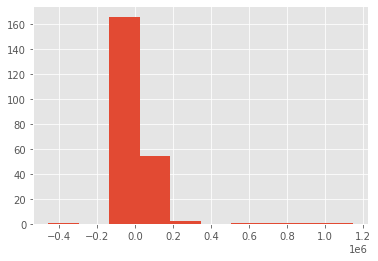

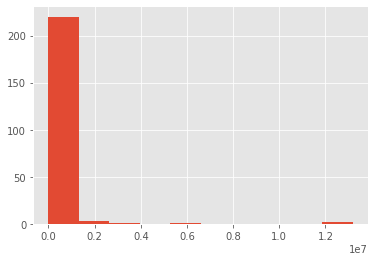

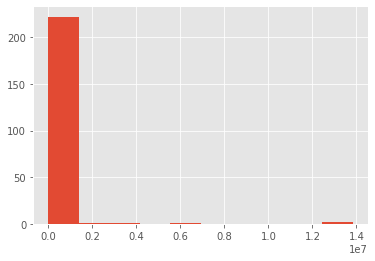

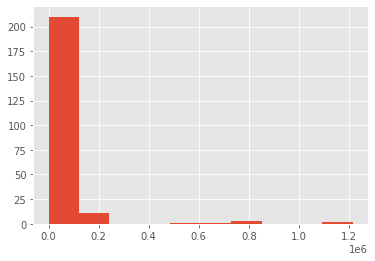

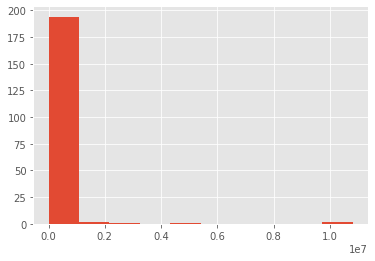

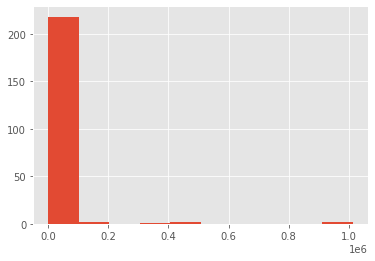

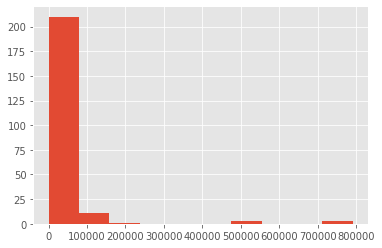

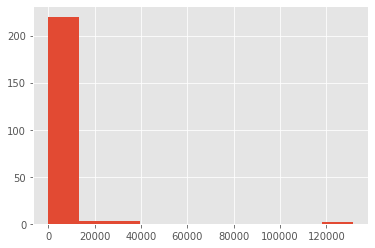

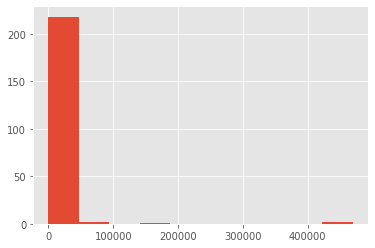

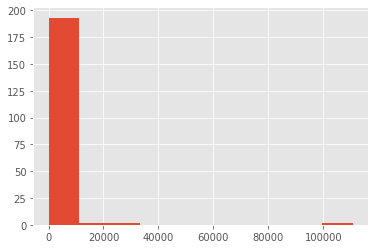

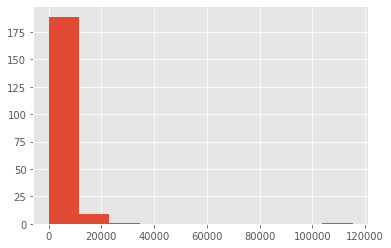

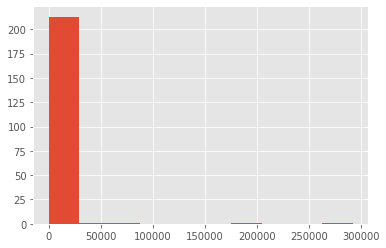

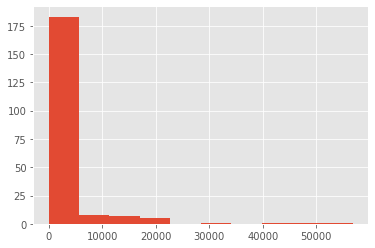

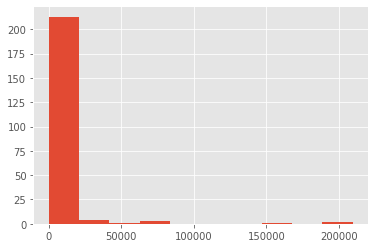

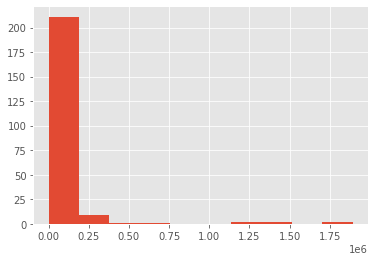

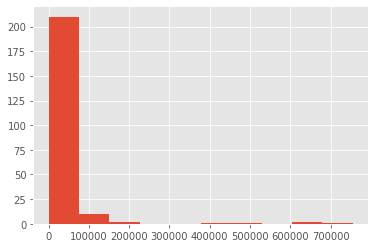

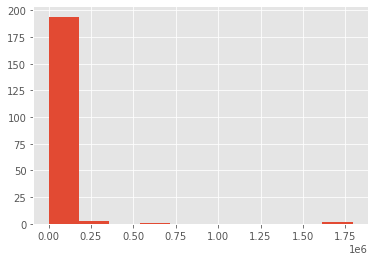

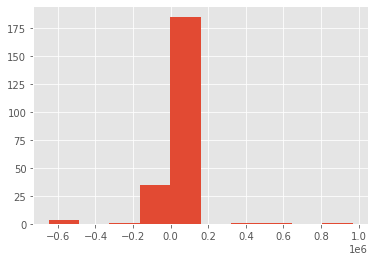

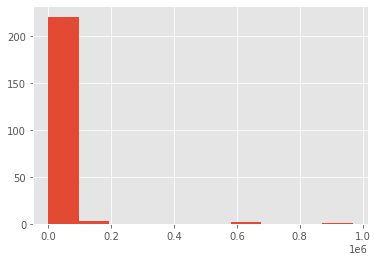

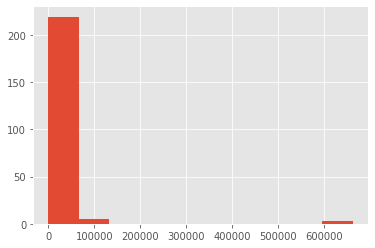

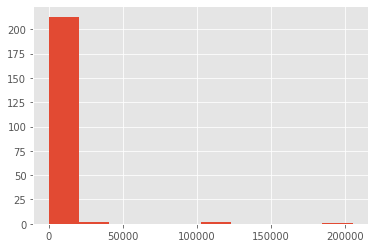

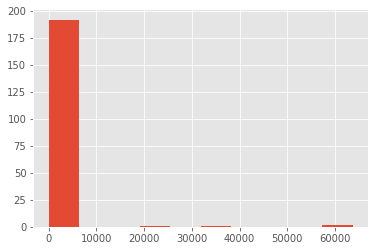

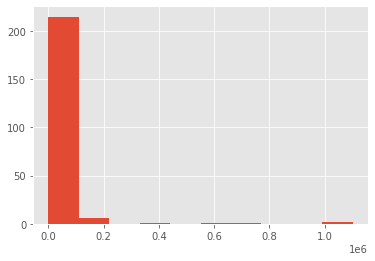

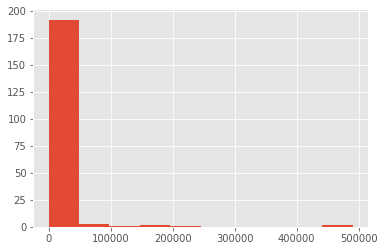

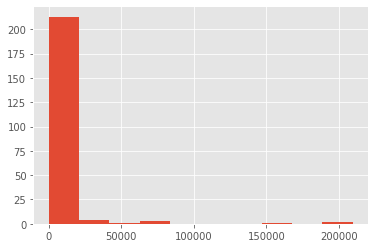

In [ ]:
# Visualicamos los outliers

for col in df_clust.columns:
  plt.figure()
  df_clust[col].hist()

In [ ]:
# separamos el pipeline del a loop, para no tener que volver a hacer los primeros 5 pasos para cada k de la loop
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
#    ("FeatureGenerator", FeatureGenerator()),
    ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = cols_to_filter)),
    ("StandardScaler", StandardScaler())
])

In [ ]:
df_scaled_transformed_no_outliers = pipe.fit_transform(df_final)

In [ ]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 15):

        print(f"Fitting pipe with {k} clusters")

        clustering_model = KMeans(n_clusters = k)

        clustering_model.fit(df_scaled_transformed_no_outliers)

        sse[k] = clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Elbow curve took 0 minutes.


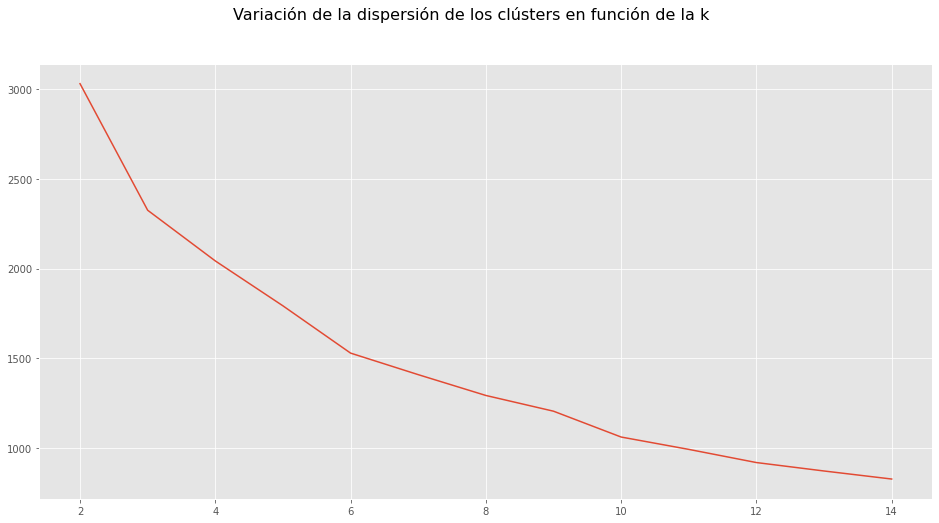

In [ ]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Parece que el número idoneo de clusers podría ser 6.

In [ ]:
# Creamos de nuevo el pipeline usando 6 clusters

pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
#    ("FeatureGenerator", FeatureGenerator()),
    ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = cols_to_filter)),
    ("StandardScaler", StandardScaler()),
    ("Clustering", KMeans(n_clusters = 6))
])

In [ ]:
df_final.shape

(228, 25)

In [ ]:
pipe.fit(df_final)

Pipeline(steps=[('Imputer', KNNImputer()),
                ('ArrayToDataFrame',
                 ArrayToDataFrame(columns=['AFOLU', 'All sectors with LULUCF',
                                           'All sectors without LULUCF',
                                           'Emissions on agricultural land',
                                           'Energy', 'Energy - food systems',
                                           'Farm-gate emissions',
                                           'Fertilizers Manufacturing',
                                           'Food Household Consumption',
                                           'Food Packaging', 'Food Processing',
                                           'Food Retail', 'Food Transport',
                                           'Food Wast...
                                              'Food Household Consumption',
                                              'Food Packaging',
                                              'Fo

In [ ]:
# creamos un dataframe escalado con los pasos 1, 3 y 5
X_processed = pipe[:2].transform(df_final)
X_scaled = pipe["StandardScaler"].transform(X_processed)

X_scaled.shape

(228, 25)

In [ ]:
# hacemos el predict, en este caso tendremos para cada cliente su centroide/clúster.
print(pipe["Clustering"].predict(X_scaled)[:20])
labels = pipe["Clustering"].predict(X_scaled)

[1 1 3 1 2 1 1 2 1 1 4 1 1 1 1 2 1 3 1 1]


(array([  6.,   0., 170.,   0.,  18.,   0.,  16.,   0.,  13.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

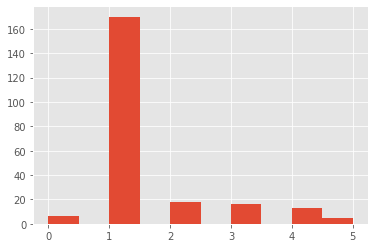

In [ ]:
# cuantos hay de cada grupo

plt.hist(labels)

In [ ]:
# le asignamos al DataFrame procesado los centroides. (antes del escalado de variable)
# SI LO HACEMOS AL ESCALADO LOS NÚMEROS PERDERAN SU SIGNIFICADO ESCALA Y SERÁN MÁS DÍFICILES DE INTERPRETAR.
X_processed["cluster"] = labels

In [ ]:
X_processed.shape

(228, 26)

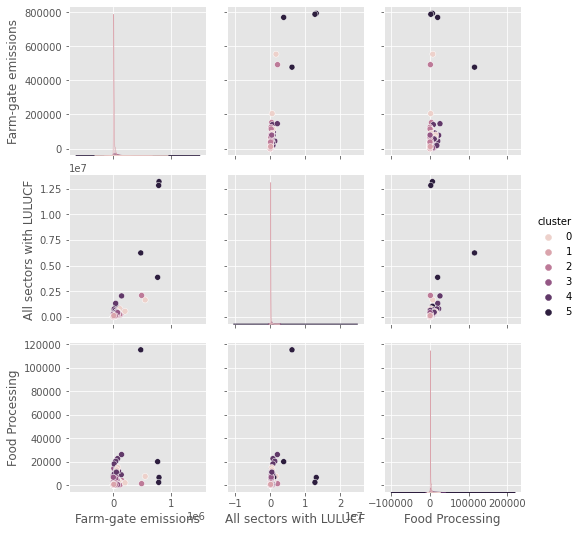

In [ ]:
# visualizamos nuestros grupos en base a las variables del modelo RFM, para ver que tal han quedado.
selected_columns = ['Farm-gate emissions', 'All sectors with LULUCF', 'Food Processing']

sns.pairplot(X_processed, vars = selected_columns, hue = 'cluster');

Añadimos más variables, de producción y Exportación e Importación. TAmbién población y quizás PIB. Lo podemos hacer con transformers. 

Variacion de emisiones desde tratado de Kioto. Quizás un la tendencia de antes y después de Kioto?   Ahora sólo hemos cogido las emisiones del último año.

## Clustering por emisiones por sector **per cápita**

### Añadimos la población al dataset de emisiones

In [ ]:
print(df_clust.shape)

NameError: ignored

In [ ]:
df_pop.Element.unique()

array(['Total Population - Both sexes', 'Total Population - Male',
       'Total Population - Female', 'Rural population',
       'Urban population'], dtype=object)

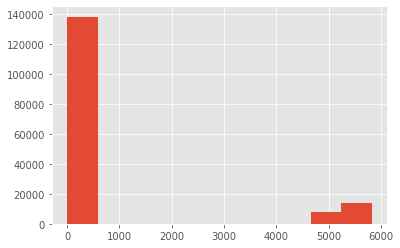

In [ ]:
# Hay agrupaciones de paises? Si

df_pop["Area Code"].hist()

In [ ]:
df_pop_both_2019 = df_pop[(df_pop.Element == 'Total Population - Both sexes') & (df_pop.Year == 2019) & (df_pop["Area Code"] < 1000)]
print(df_pop_both_2019.shape)


(237, 12)


In [ ]:
df_pop_both_2019.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

In [ ]:
df_pop_both_2019.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
69,2,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2019,2019,1000 persons,38041.754,X,NaN
724,3,Albania,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2019,2019,1000 persons,2880.917,X,NaN
1379,4,Algeria,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2019,2019,1000 persons,43053.054,X,NaN
2034,5,American Samoa,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2019,2019,1000 persons,55.312,X,NaN
2387,6,Andorra,3010,Population - Est. & Proj.,511,Total Population - Both sexes,2019,2019,1000 persons,77.142,X,NaN


<BarContainer object of 237 artists>

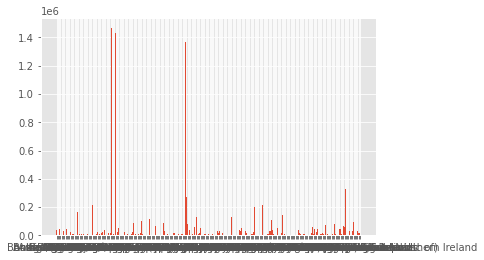

In [ ]:


#plt.plot(df_pop_both_2019["Area"], df_pop_both_2019["Value"])
#fig = px.bar(tabla_orden, x=TARGET, y="Area", title="Cuotas Emisiones GEI por Área", text=TARGET, orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area[TARGET])+100000000])

#fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

#plt.bar(x=df_pop_both_2019["pxArea"].values, height=df_pop_both_2019["Value"].values)

In [ ]:
# Hacemos pivot table

df_pop_both_2019_pivot = df_pop_both_2019.pivot_table(index="Area",columns="Element",values="Value",aggfunc="mean")

In [ ]:
df_pop_both_2019_pivot.head()

Element,Total Population - Both sexes
Area,
Afghanistan,38041.754
Albania,2880.917
Algeria,43053.054
American Samoa,55.312
Andorra,77.142


In [ ]:
# En la tabla de poblacion hay más Areas que en la de Emisiones. Haremos un merge left de la tabla de emisiones, para que no falte ningun Area
print(df_clust.shape)
df_emis_pop_2019 = pd.merge(df_clust, df_pop_both_2019_pivot, on = "Area", how="left")
print(df_emis_pop_2019.shape)

(228, 25)
(228, 26)


In [ ]:
# Comprobamos si hay alguna fila que no se le ha podido asignar población.

df_emis_pop_2019[df_emis_pop_2019["Total Population - Both sexes"].isnull()]

,AFOLU,All sectors with LULUCF,All sectors without LULUCF,Emissions on agricultural land,Energy,Energy - food systems,Farm-gate emissions,Fertilizers Manufacturing,Food Household Consumption,Food Packaging,...,IPPU,LULUCF,LULUCF - food systems,Land Use change,On-farm electricity use,Other,Pre- and post- production,Waste,Waste - food systems,Total Population - Both sexes
Area,,,,,,,,,,,,,,,,,,,,,
Norfolk Island,0.1275,0.1275,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.1275,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Pitcairn,0.0000,0.0000,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 ## Estos dos países se podrían eliminar porque está prácticamente todos sus variables a 0 o Nulos!

In [ ]:
df_emis_pop_2019 = df_emis_pop_2019.drop(index=["Pitcairn", "Norfolk Island"])

In [ ]:
df_emis_pop_2019.shape

(226, 26)

In [ ]:
df_emis_pop_2019.columns

Index(['AFOLU', 'All sectors with LULUCF', 'All sectors without LULUCF',
       'Emissions on agricultural land', 'Energy', 'Energy - food systems',
       'Farm-gate emissions', 'Fertilizers Manufacturing',
       'Food Household Consumption', 'Food Packaging', 'Food Processing',
       'Food Retail', 'Food Transport', 'Food Waste Disposal', 'Food systems',
       'IPCC Agriculture', 'IPPU', 'LULUCF', 'LULUCF - food systems',
       'Land Use change', 'On-farm electricity use', 'Other',
       'Pre- and post- production', 'Waste', 'Waste - food systems',
       'Total Population - Both sexes', 'Div_pop_All sectors without LULUCF',
       'Div_pop_Emissions on agricultural land', 'Div_pop_Farm-gate emissions',
       'Div_pop_Pre- and post- production'],
      dtype='object')

In [ ]:
## Creo noves variables dividides per la població.

df_emis_pop_2019["Div_pop_All sectors without LULUCF"] = df_emis_pop_2019["All sectors without LULUCF"]/df_emis_pop_2019["Total Population - Both sexes"]
df_emis_pop_2019["Div_pop_Emissions on agricultural land"] = df_emis_pop_2019["Emissions on agricultural land"]/df_emis_pop_2019["Total Population - Both sexes"]
df_emis_pop_2019['Div_pop_Farm-gate emissions'] = df_emis_pop_2019['Farm-gate emissions']/df_emis_pop_2019["Total Population - Both sexes"]
df_emis_pop_2019['Div_pop_Pre- and post- production'] = df_emis_pop_2019['Pre- and post- production']/df_emis_pop_2019["Total Population - Both sexes"]
df_emis_pop_2019['Div_pop_Fertilizers Manufacturing'] = df_emis_pop_2019['Fertilizers Manufacturing']/df_emis_pop_2019["Total Population - Both sexes"]
df_emis_pop_2019['Div_pop_LULUCF'] = df_emis_pop_2019['LULUCF']/df_emis_pop_2019["Total Population - Both sexes"]



In [ ]:
lista_vars = list(df_emis_pop_2019.columns[-7:])
lista_vars

['Total Population - Both sexes',
 'Div_pop_All sectors without LULUCF',
 'Div_pop_Emissions on agricultural land',
 'Div_pop_Farm-gate emissions',
 'Div_pop_Pre- and post- production',
 'Div_pop_Fertilizers Manufacturing',
 'Div_pop_LULUCF']

In [ ]:
df_emis_pop_2019.sum()

AFOLU                                     7.630380e+06
All sectors with LULUCF                   6.583230e+07
All sectors without LULUCF                6.482811e+07
Emissions on agricultural land            1.150841e+07
Energy                                    4.834216e+07
Energy - food systems                     5.595419e+06
Farm-gate emissions                       8.005665e+06
Fertilizers Manufacturing                 5.397365e+05
Food Household Consumption                1.777991e+06
Food Packaging                            4.207369e+05
Food Processing                           5.159535e+05
Food Retail                               9.499882e+05
Food Transport                            5.758168e+05
Food Waste Disposal                       1.487217e+06
Food systems                              1.838134e+07
IPCC Agriculture                          6.626191e+06
IPPU                                      6.679364e+06
LULUCF                                    1.004189e+06
LULUCF - f

In [ ]:
df_emis_pop_2019["LULUCF - food systems"].sort_values().head(100).tail(20)

Area
Slovakia                   31.1137
Armenia                    36.0668
Iceland                    37.0919
New Caledonia              39.6173
Guadeloupe                 44.4400
Singapore                  49.6497
Bosnia and Herzegovina     49.9136
Comoros                    59.9674
Mali                       80.2659
Israel                     81.7667
Trinidad and Tobago        83.9049
Puerto Rico                93.0379
Samoa                     104.2624
Kenya                     106.1726
Fiji                      107.2196
Republic of Moldova       111.0837
Albania                   114.1346
Ghana                     119.1447
Uruguay                   137.9778
Belgium                   159.3106
Name: LULUCF - food systems, dtype: float64

In [ ]:
df_emis_pop_2019.loc["Puerto Rico"]

AFOLU                                    -1743.964100
All sectors with LULUCF                  -1743.964100
All sectors without LULUCF                 854.201000
Emissions on agricultural land             947.238900
Energy                                            NaN
Energy - food systems                     1737.817900
Farm-gate emissions                        947.238900
Fertilizers Manufacturing                    0.000000
Food Household Consumption                 815.319000
Food Packaging                                    NaN
Food Processing                                   NaN
Food Retail                                919.544200
Food Transport                               2.954700
Food Waste Disposal                       1047.804200
Food systems                              3732.861000
IPCC Agriculture                           854.201000
IPPU                                              NaN
LULUCF                                   -2598.165100
LULUCF - food systems       

In [ ]:
df_clust = df_emis_pop_2019[lista_vars]
df_clust

,Total Population - Both sexes,Div_pop_All sectors without LULUCF,Div_pop_Emissions on agricultural land,Div_pop_Farm-gate emissions,Div_pop_Pre- and post- production,Div_pop_Fertilizers Manufacturing,Div_pop_LULUCF
Area,,,,,,,
Afghanistan,38041.754,0.865465,0.432978,0.432978,0.116606,0.000611,0.004065
Albania,2880.917,3.326769,1.181635,1.181635,0.488936,0.000000,-0.082571
Algeria,43053.054,6.534415,0.317502,0.302685,0.904992,0.081096,0.005206
American Samoa,55.312,0.000036,0.166830,0.000036,0.149443,0.000000,-0.743924
Angola,31825.295,3.306881,2.666654,1.162186,0.173488,0.000000,1.527389
...,...,...,...,...,...,...,...
Wallis and Futuna Islands,11.432,0.000000,0.084465,0.084465,0.060296,0.000000,0.000000
Western Sahara,582.463,0.000359,0.000359,0.000359,0.024404,0.000000,-0.179523
Yemen,29161.922,1.254256,0.254938,0.254938,0.158672,0.000000,0.000000


In [ ]:
df_final = df_clust.copy(deep = True)
columns = list(df_final.columns)
index = list(df_final.index)
cols_to_filter = list(df_clust.columns)

In [ ]:
# separamos el pipeline del a loop, para no tener que volver a hacer los primeros 5 pasos para cada k de la loop
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
#    ("FeatureGenerator", FeatureGenerator()),
    ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = cols_to_filter)),
    ("StandardScaler", StandardScaler())
])

In [ ]:
df_scaled_transformed_no_outliers = pipe.fit_transform(df_final)

In [ ]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 15):

        print(f"Fitting pipe with {k} clusters")

        clustering_model = KMeans(n_clusters = k)

        clustering_model.fit(df_scaled_transformed_no_outliers)

        sse[k] = clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Elbow curve took 0 minutes.


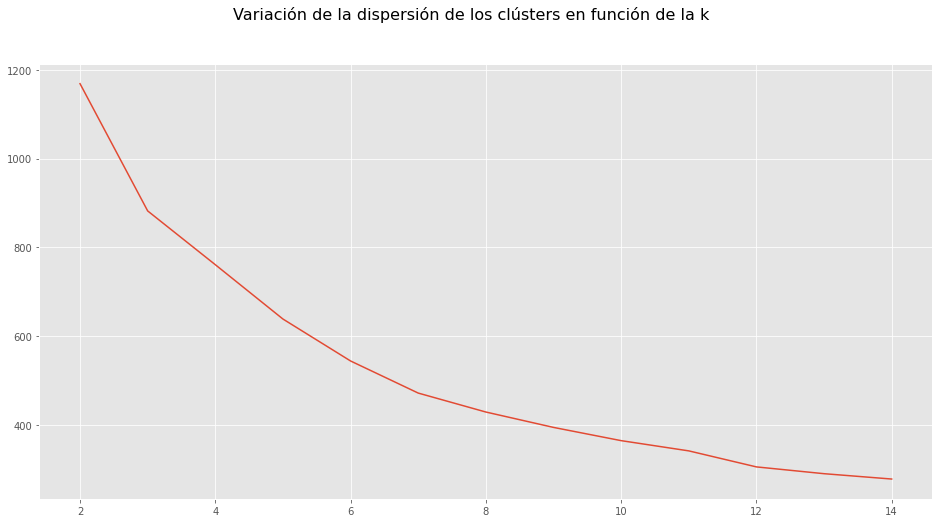

In [ ]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

La curba no acaba de hacer forma de codo. Las variables no son del todo informativas como para hacer grupos bien esparados. Tendremos que añadir otras variables, como las de producción, exportación/exportacion
Variacion antes y despues de Kioto.

De todos modos podríamos hacer 3 clusters

In [ ]:
# Creamos de nuevo el pipeline usando 6 clusters

pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
#    ("FeatureGenerator", FeatureGenerator()),
    ("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = cols_to_filter)),
    ("StandardScaler", StandardScaler()),
    ("Clustering", KMeans(n_clusters = 3))
])

In [ ]:
df_final.shape

(226, 7)

In [ ]:
pipe.fit(df_final)

Pipeline(steps=[('Imputer', KNNImputer()),
                ('ArrayToDataFrame',
                 ArrayToDataFrame(columns=['Total Population - Both sexes',
                                           'Div_pop_All sectors without LULUCF',
                                           'Div_pop_Emissions on agricultural '
                                           'land',
                                           'Div_pop_Farm-gate emissions',
                                           'Div_pop_Pre- and post- production',
                                           'Div_pop_Fertilizers Manufacturing',
                                           'Div_pop_LULUCF'],
                                  index=['Afghanistan', 'Albania', 'Algeria',
                                         'Amer...
                ('OutlierFilter',
                 OutlierFilter(col_to_filter=['Total Population - Both sexes',
                                              'Div_pop_All sectors without '
                  

In [ ]:
# creamos un dataframe escalado con los pasos 1, 3 y 5
X_processed = pipe[:2].transform(df_final)
X_scaled = pipe["StandardScaler"].transform(X_processed)

X_scaled.shape

(226, 7)

In [ ]:
# hacemos el predict, en este caso tendremos para cada cliente su centroide/clúster.
print(pipe["Clustering"].predict(X_scaled)[:20])
labels = pipe["Clustering"].predict(X_scaled)

[1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 1 1 0 1 2]


(array([ 25.,   0.,   0.,   0.,   0., 173.,   0.,   0.,   0.,  28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

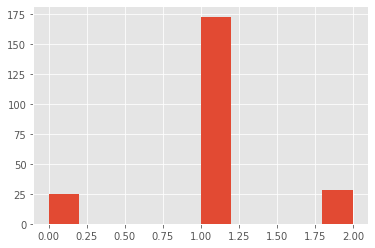

In [ ]:
# cuantos hay de cada grupo

plt.hist(labels)

In [ ]:
# le asignamos al DataFrame procesado los centroides. (antes del escalado de variable)
# SI LO HACEMOS AL ESCALADO LOS NÚMEROS PERDERAN SU SIGNIFICADO ESCALA Y SERÁN MÁS DÍFICILES DE INTERPRETAR.
X_processed["cluster"] = labels

In [ ]:
X_processed.shape

(226, 8)

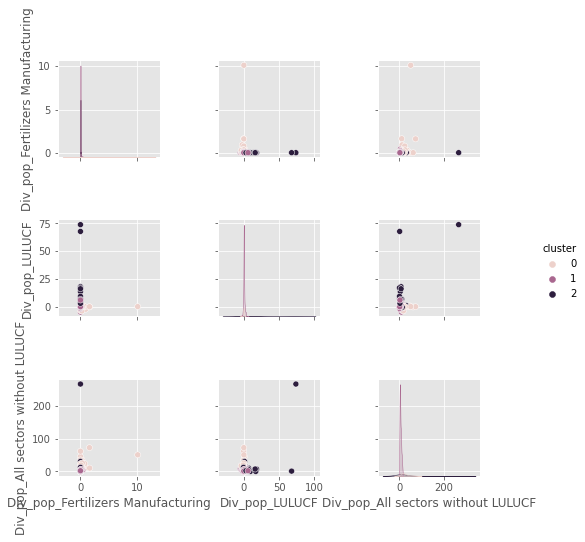

In [ ]:
# visualizamos nuestros grupos en base a las variables del modelo RFM, para ver que tal han quedado.
selected_columns = ['Div_pop_Fertilizers Manufacturing', 'Div_pop_LULUCF', "Div_pop_All sectors without LULUCF"]

sns.pairplot(X_processed, vars = selected_columns, hue = 'cluster');

Cojo el pickle con la información de Import_Export por país y continentes.

In [ ]:
unpickled_df = pd.read_pickle("/content/drive/MyDrive/Formació/MASTER NUCLIO/Capstone Project/datasets/df_Import_Export_Continentes.pkl") 

In [ ]:
unpickled_df.shape

(8622, 9)

In [ ]:
unpickled_df.head()

Grupo de países,Reporter Country Code,Reporter Countries,Year Code,Américas,Asia,Europa,Oceanía,África,Element
0,2,Afghanistan,2009,42795.0,1249016.0,129430.0,151.0,3324.0,Import Quantity
1,2,Afghanistan,2010,89333.0,1117140.0,29063.0,757.0,13314.0,Import Quantity
2,2,Afghanistan,2011,63995.0,1150962.0,14128.0,816.0,31800.0,Import Quantity
3,2,Afghanistan,2014,65068.0,3345901.0,49020.0,176.0,76.0,Import Quantity
4,2,Afghanistan,2015,66864.0,4935864.0,51525.0,222.0,59.0,Import Quantity


In [ ]:
unpickled_df.Element.unique()

array(['Import Quantity', 'Export Quantity'], dtype=object)